<a href="https://colab.research.google.com/github/pjsutar/PYTHON-for-Data-Science-Projects/blob/main/demandDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy Demand Datat Analysis for Peak Shaving**

Citizens Energy Group (Citizens) is currently constructing the DigIndy Tunnel System which will capture and store combined sewer overflows (CSOs) during wet weather events which will prevent the CSO discharge from reaching area waterways. When it will be completed in 2025, Citizen Energy Group’s DigIndy Tunnel System, a 28 miles network of 18 feet diameter tunnels beneath the city will virtually eliminate sewer overflows to area waterways that now occur during moderate to heavy rain events. Once a rain event has passed, the tunnel system will be dewatered using a large pump station to pump the captured CSO flow into one of Citizens’ Advanced Wastewater Treatment Facilities (ATF). With the four pumps running, a new peak charge will be set for the ATF, which will significantly increase Citizens’ operation expenses. The Pump Station Generator Peak Shaving Study will evaluate the costs and benefits of using a generator or CHP to provide power to the pump station reducing the peak demand required through the existing electrical grid.

(*Due to non-disclosure agreement only a portion of project is shown here with necessary permissions*)

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
data = pd.read_csv("Demand_data_20180118-20180917.csv")
data

,Meter ID,Date / Time,KW(ch: 1 set:0),KVAR(ch: 2 set:0),KVA(0(ch: 2 set:0),PF(0(ch: 3 set:0)
0,P60339570,1/18/18 00:15,4790.9120,0.0000,4790.9120,1.0000
1,P60339570,1/18/18 00:30,4823.2128,0.0000,4823.2128,1.0000
2,P60339570,1/18/18 00:45,4857.6192,0.0000,4857.6192,1.0000
3,P60339570,1/18/18 01:00,4959.1364,4.3008,4959.1383,1.0000
4,P60339570,1/18/18 01:15,5008.9984,0.0000,5008.9984,1.0000
...,...,...,...,...,...,...
23319,P60339570,9/17/18 23:00,4367.1040,1164.4864,4519.6931,0.9662
23320,P60339570,9/17/18 23:15,4338.7012,1156.9152,4490.2985,0.9662
23321,P60339570,9/17/18 23:30,4424.3136,1160.8128,4574.0613,0.9673
23322,P60339570,9/17/18 23:45,4630.3488,1193.8304,4781.7738,0.9683


In [ ]:
#Data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23324 entries, 0 to 23323
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Meter ID                23324 non-null  object 
 1   Date / Time             23324 non-null  object 
 2   KW(ch: 1  set:0)        23324 non-null  float64
 3   KVAR(ch: 2  set:0)      23324 non-null  float64
 4   KVA(0(ch: 2  set:0)     23324 non-null  float64
 5   PF(0(ch: 3  set:0)      23324 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [ ]:
for feat in data.select_dtypes(exclude='number'):
  print('----------')
  print('{}\n'.format(feat))
  print('{}\n'.format(data[feat].value_counts()))

----------
Meter ID           

P60339570              23324
Name: Meter ID           , dtype: int64

----------
Date / Time           

7/14/18 22:00             1
1/22/18 22:45             1
5/5/18 21:00              1
3/25/18 09:30             1
6/15/18 01:00             1
                         ..
4/5/18 04:30              1
4/9/18 15:30              1
4/12/18 23:00             1
3/14/18 08:00             1
5/22/18 13:15             1
Name: Date / Time           , Length: 23324, dtype: int64




*   value of interest is "KW" readings
*   date not in datetime format
*   start / end time: in hh:mm format but not datetime
*   maybe good idea to calculate duration
*   Meter ID is same for all values
*   No repeated readings









/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


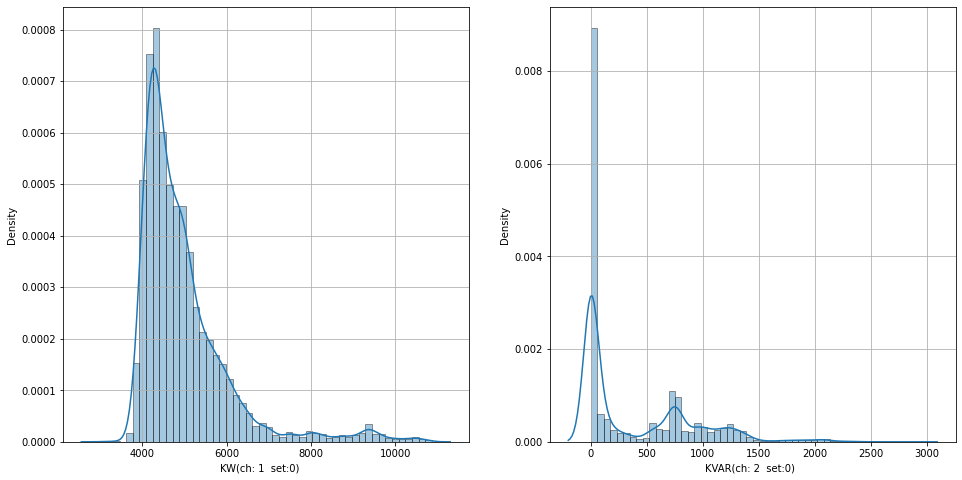

In [ ]:
fig, sub = plt.subplots(1, 2, figsize=(16,8))
for feat, subplot in zip(data.select_dtypes(include="number"),sub):
    sns.distplot(data[feat],ax=subplot, hist_kws={"edgecolor":"black"})
    subplot.grid()

KW Demand: Right-skewed distribution

In [ ]:
data.isnull().sum() / data.shape[0]

Meter ID                  0.0
Date / Time               0.0
KW(ch: 1  set:0)          0.0
KVAR(ch: 2  set:0)        0.0
KVA(0(ch: 2  set:0)       0.0
PF(0(ch: 3  set:0)        0.0
dtype: float64

# Data Processing

In [ ]:
data.columns = ['Meter ID', 'DateTime', 'KW', 'KVAR', 'KVA', 'PF']

In [ ]:
#Drop meter ids
data.drop(['Meter ID'], axis=1, inplace=True)

In [ ]:
data.head()

,DateTime,KW,KVAR,KVA,PF
0,1/18/18 00:15,4790.9120,0.0000,4790.9120,1.0
1,1/18/18 00:30,4823.2128,0.0000,4823.2128,1.0
2,1/18/18 00:45,4857.6192,0.0000,4857.6192,1.0
3,1/18/18 01:00,4959.1364,4.3008,4959.1383,1.0
4,1/18/18 01:15,5008.9984,0.0000,5008.9984,1.0


Transform Date and Time to datetime format

In [ ]:
#Obtaining End Time from Start time
#to_datetime
from datetime import datetime
data['DateTime'] = data['DateTime'].str.strip()
#data['DateTime'] = datetime.strptime(data['DateTime'],format="%m/%d/%Y %H:%M")
data['DateTime'] = data['DateTime'].astype('datetime64[ns]')
#data

In [ ]:
#separating datetime

print(type(data['DateTime'][0]))
data["Year"] = data["DateTime"].dt.year
data["Month"] = data["DateTime"].dt.month
data["Day"] = data["DateTime"].dt.day
data["Hour"] = data["DateTime"].dt.hour
data["Start"] = data["DateTime"].dt.minute
#data

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Estimating End Time

In [ ]:
End1 = data['Start'].tolist()
print(End1)

End = []*len(End1)
for i in End1:
  if i == 15:
    End.append(29)
  elif i == 30:
    End.append(44)
  elif i == 45:
    End.append(59)
  else:
    End.append(14)

  #print(End)


[15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 45, 0, 15, 30, 4

In [ ]:
data['End'] = End
data

,DateTime,KW,KVAR,KVA,PF,Year,Month,Day,Hour,Start,End
0,2018-01-18 00:15:00,4790.9120,0.0000,4790.9120,1.0000,2018,1,18,0,15,29
1,2018-01-18 00:30:00,4823.2128,0.0000,4823.2128,1.0000,2018,1,18,0,30,44
2,2018-01-18 00:45:00,4857.6192,0.0000,4857.6192,1.0000,2018,1,18,0,45,59
3,2018-01-18 01:00:00,4959.1364,4.3008,4959.1383,1.0000,2018,1,18,1,0,14
4,2018-01-18 01:15:00,5008.9984,0.0000,5008.9984,1.0000,2018,1,18,1,15,29
...,...,...,...,...,...,...,...,...,...,...,...
23319,2018-09-17 23:00:00,4367.1040,1164.4864,4519.6931,0.9662,2018,9,17,23,0,14
23320,2018-09-17 23:15:00,4338.7012,1156.9152,4490.2985,0.9662,2018,9,17,23,15,29
23321,2018-09-17 23:30:00,4424.3136,1160.8128,4574.0613,0.9673,2018,9,17,23,30,44
23322,2018-09-17 23:45:00,4630.3488,1193.8304,4781.7738,0.9683,2018,9,17,23,45,59


Estimating Duration of Intervals

In [ ]:
#Interval measurement or Duration
data['Duration'] = abs(data['End'] - data['Start'])
data

,DateTime,KW,KVAR,KVA,PF,Year,Month,Day,Hour,Start,End,Duration
0,2018-01-18 00:15:00,4790.9120,0.0000,4790.9120,1.0000,2018,1,18,0,15,29,14
1,2018-01-18 00:30:00,4823.2128,0.0000,4823.2128,1.0000,2018,1,18,0,30,44,14
2,2018-01-18 00:45:00,4857.6192,0.0000,4857.6192,1.0000,2018,1,18,0,45,59,14
3,2018-01-18 01:00:00,4959.1364,4.3008,4959.1383,1.0000,2018,1,18,1,0,14,14
4,2018-01-18 01:15:00,5008.9984,0.0000,5008.9984,1.0000,2018,1,18,1,15,29,14
...,...,...,...,...,...,...,...,...,...,...,...,...
23319,2018-09-17 23:00:00,4367.1040,1164.4864,4519.6931,0.9662,2018,9,17,23,0,14,14
23320,2018-09-17 23:15:00,4338.7012,1156.9152,4490.2985,0.9662,2018,9,17,23,15,29,14
23321,2018-09-17 23:30:00,4424.3136,1160.8128,4574.0613,0.9673,2018,9,17,23,30,44,14
23322,2018-09-17 23:45:00,4630.3488,1193.8304,4781.7738,0.9683,2018,9,17,23,45,59,14


Time frame in which the data lies

In [ ]:
print("first data point in time, START TIME: {}".format(data["Start"].min()))
print("last data point in time, START TIME: {}".format(data["Start"].max()))
print("\n")
print("first data point in time, END TIME: {}".format(data["End"].min()))
print("last data point in time, END TIME: {}".format(data["End"].max()))
print("\n")
data['Duration'].value_counts()

first data point in time, START TIME: 0
last data point in time, START TIME: 45


first data point in time, END TIME: 14
last data point in time, END TIME: 59




14    23324
Name: Duration, dtype: int64

Distribution of Vlues over Months, Days and Hours

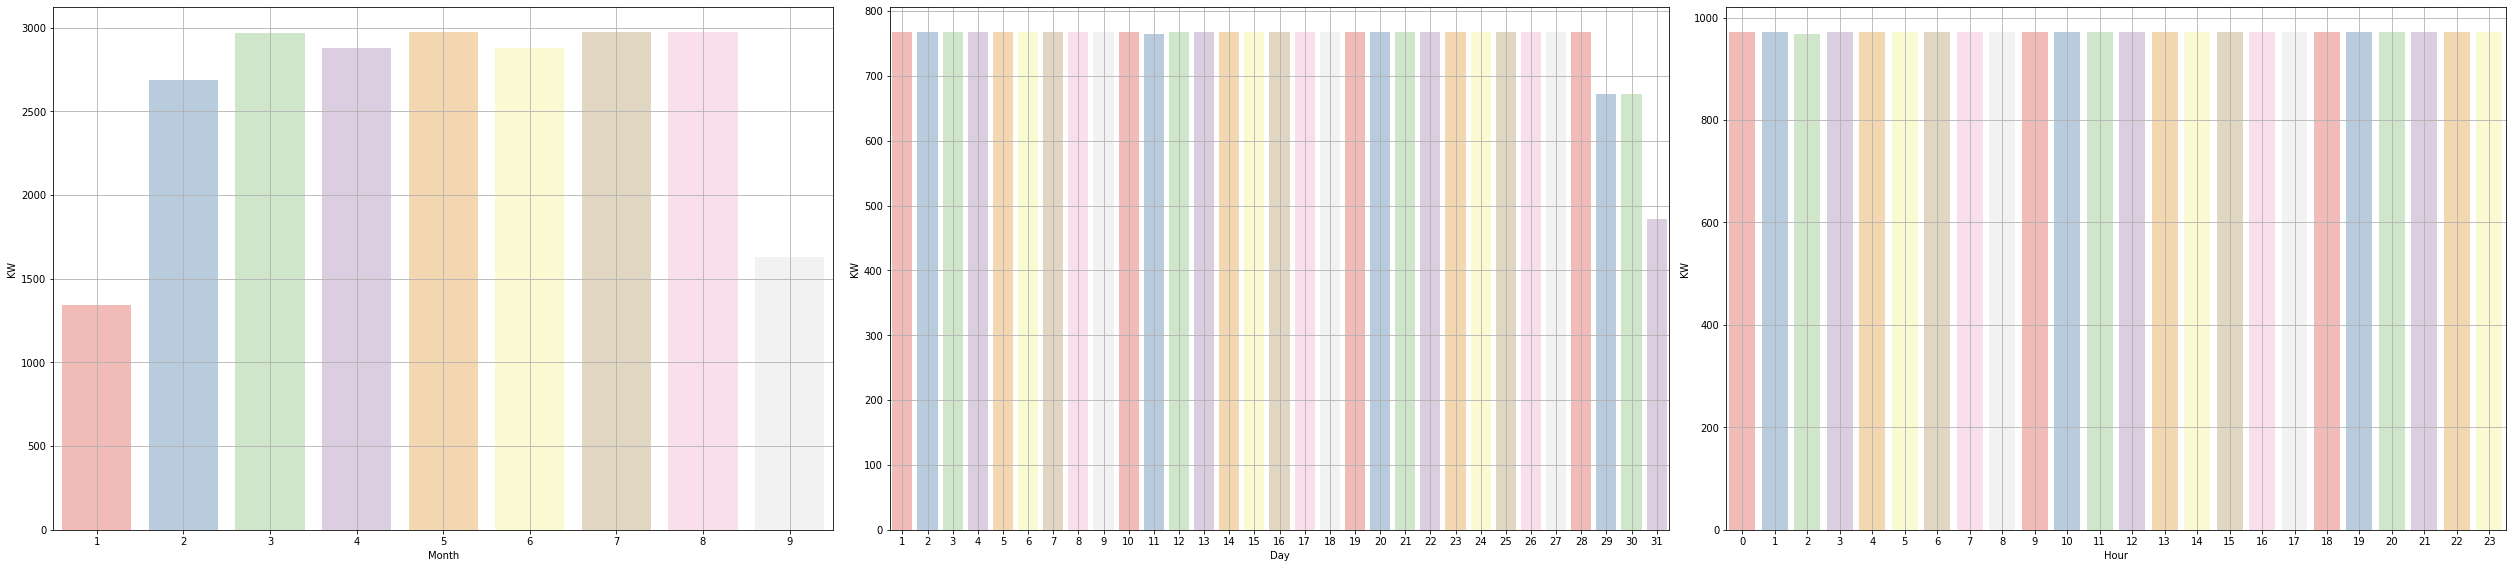

In [ ]:
fig,sub = plt.subplots(1,3,figsize=(35,8))
month_count = data.groupby("Month")["KW"].count()
day_count = data.groupby("Day")["KW"].count()
hour_count = data.groupby("Hour")["KW"].count()

for feat, subplot in zip([month_count,day_count, hour_count],sub):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()

Average Energy Consumption over Months, Days and Hours

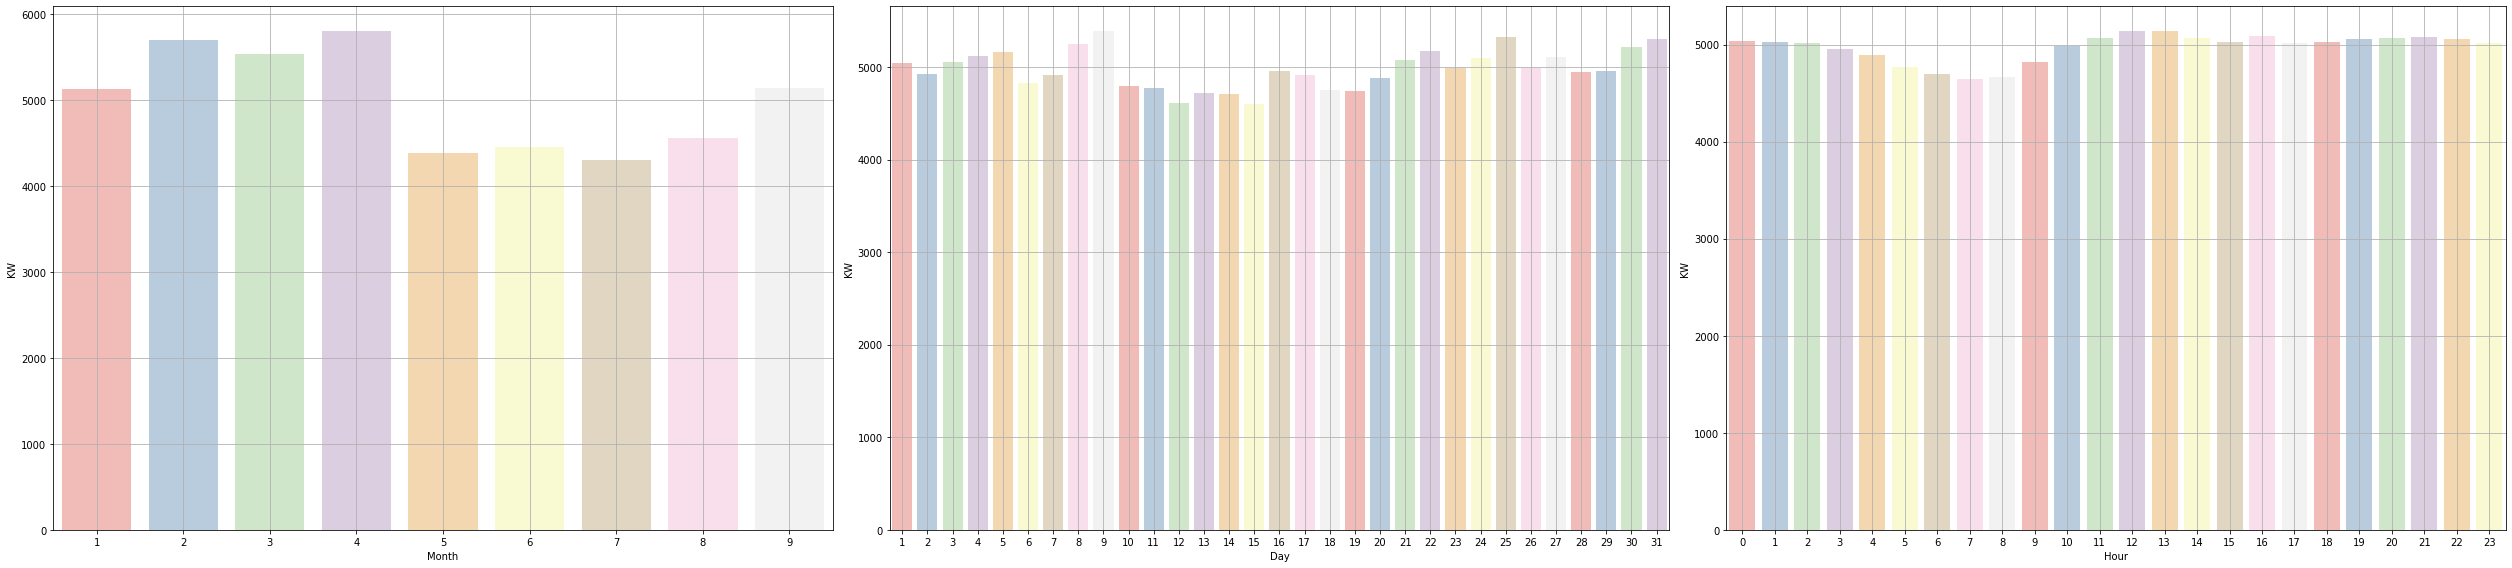

In [ ]:
fig,sub = plt.subplots(1,3,figsize=(35,8))
month_usage_mean = data.groupby("Month")["KW"].mean()
day_usage_mean = data.groupby("Day")["KW"].mean()
hour_usage_mean = data.groupby("Hour")["KW"].mean()

list_mean = [month_usage_mean,day_usage_mean,hour_usage_mean]

for feat, subplot in zip(list_mean,sub.flatten()):
    sns.barplot(x=feat.index, y=feat, ax=subplot,palette="Pastel1")
    subplot.grid()
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

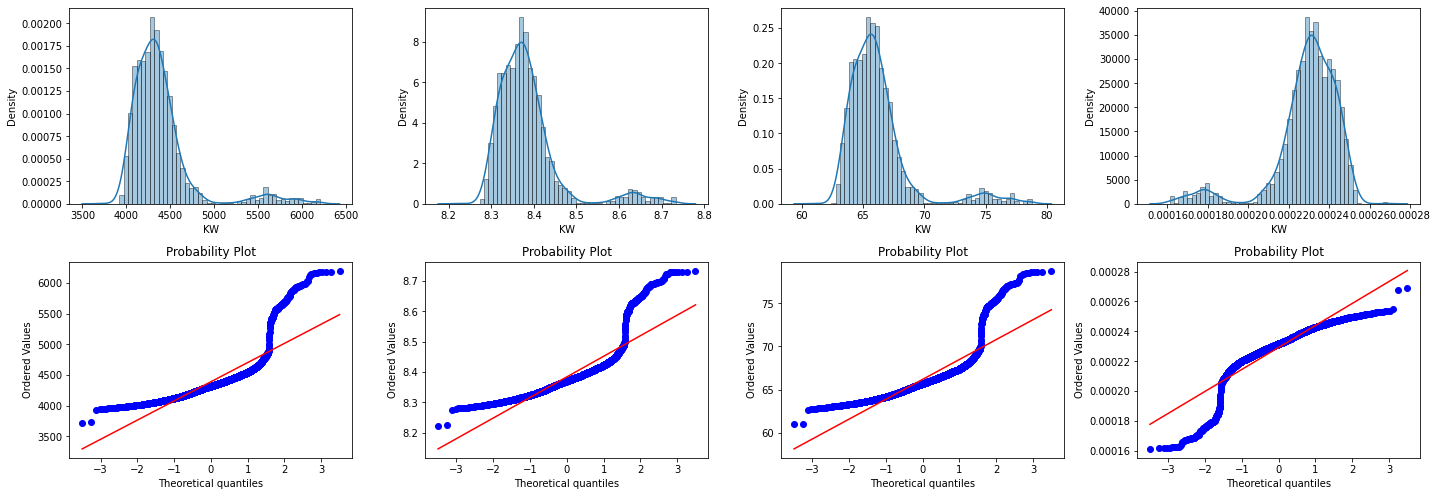

In [ ]:
import scipy.stats as stats

fig, sub = plt.subplots(2,4,figsize=(20,7))

sns.distplot(data[data["Month"]==5]["KW"],  ax=sub[0][0], hist_kws={"edgecolor":"black"})
sns.distplot(np.log1p(data[data["Month"]==5]["KW"]),  ax=sub[0][1], hist_kws={"edgecolor":"black"})
sns.distplot((data[data["Month"]==5]["KW"])**(1/2),  ax=sub[0][2], hist_kws={"edgecolor":"black"})
sns.distplot(1/(data[data["Month"]==5]["KW"]),  ax=sub[0][3], hist_kws={"edgecolor":"black"})
#sns.distplot(stats.boxcox(data[data["Month"]==5]["KW"])[0],  ax=sub[0][4], hist_kws={"edgecolor":"black"})

prob = stats.probplot(data[data["Month"]==5]["KW"], dist=stats.norm, plot=sub[1][0])
prob = stats.probplot(np.log1p(data[data["Month"]==5]["KW"]), dist=stats.norm, plot=sub[1][1])
prob = stats.probplot((data[data["Month"]==5]["KW"])**(1/2), dist=stats.norm, plot=sub[1][2])
prob = stats.probplot(1/(data[data["Month"]==5]["KW"]), dist=stats.norm, plot=sub[1][3])
#prob = stats.probplot(stats.boxcox(data[data["Month"]==5]["KW"])[0], dist=stats.norm, plot=sub[1][4])

fig.tight_layout()

In [ ]:
from itertools import combinations
month_list = data["Month"].unique()

for feat1, feat2 in combinations(month_list,2):
    t, p = stats.mannwhitneyu(data[data["Month"]==feat1]["KW"],data[data["Month"]==feat2]["KW"])
    if p < 0.05:
        print("p-value of Mann-Whitney-Test between {} and {}: {}".format(feat1,feat2, p))

p-value of Mann-Whitney-Test between 1 and 2: 4.031179248318772e-45
p-value of Mann-Whitney-Test between 1 and 3: 2.840374819412306e-24
p-value of Mann-Whitney-Test between 1 and 4: 5.24129378636556e-124
p-value of Mann-Whitney-Test between 1 and 5: 0.0
p-value of Mann-Whitney-Test between 1 and 6: 0.0
p-value of Mann-Whitney-Test between 1 and 7: 0.0
p-value of Mann-Whitney-Test between 1 and 8: 1.0448426786870264e-256
p-value of Mann-Whitney-Test between 1 and 9: 1.695727334427617e-90
p-value of Mann-Whitney-Test between 2 and 3: 3.96504545241544e-07
p-value of Mann-Whitney-Test between 2 and 4: 5.5613626329005916e-24
p-value of Mann-Whitney-Test between 2 and 5: 0.0
p-value of Mann-Whitney-Test between 2 and 6: 0.0
p-value of Mann-Whitney-Test between 2 and 7: 0.0
p-value of Mann-Whitney-Test between 2 and 8: 0.0
p-value of Mann-Whitney-Test between 2 and 9: 1.400019811688333e-222
p-value of Mann-Whitney-Test between 3 and 4: 1.0972423110509188e-48
p-value of Mann-Whitney-Test betwe

In [ ]:
stats.kruskal(*[data[data["Day"]==day]["KW"].values for day in data["Day"].unique()])

KruskalResult(statistic=614.1421164376106, pvalue=3.482295172098373e-110)

In [ ]:
stats.kruskal(*[data[data["Hour"]==hour]["KW"].values for hour in data["Hour"].unique()])

KruskalResult(statistic=1113.2495046590116, pvalue=1.0521496004789828e-220)

In [ ]:
hour_list = data["Hour"].unique()

for feat1, feat2 in combinations(hour_list,2):
    t, p = stats.mannwhitneyu(data[data["Hour"]==feat1]["KW"],data[data["Hour"]==feat2]["KW"])
    if p < 0.05:
        print("p-value of Mann-Whitney-Test between {} and {}: {}".format(feat1,feat2, p))

p-value of Mann-Whitney-Test between 0 and 3: 0.0019897514364246136
p-value of Mann-Whitney-Test between 0 and 4: 2.1309795381013033e-08
p-value of Mann-Whitney-Test between 0 and 5: 1.1564139036633656e-27
p-value of Mann-Whitney-Test between 0 and 6: 1.0457939837671247e-42
p-value of Mann-Whitney-Test between 0 and 7: 1.8544023935997204e-53
p-value of Mann-Whitney-Test between 0 and 8: 1.2888105473455079e-47
p-value of Mann-Whitney-Test between 0 and 9: 4.553175822698704e-28
p-value of Mann-Whitney-Test between 0 and 10: 8.227588449556645e-14
p-value of Mann-Whitney-Test between 0 and 11: 1.1128267557280683e-07
p-value of Mann-Whitney-Test between 0 and 12: 0.0003729647774841651
p-value of Mann-Whitney-Test between 0 and 13: 0.0017801996577544923
p-value of Mann-Whitney-Test between 0 and 14: 5.0966085683051304e-05
p-value of Mann-Whitney-Test between 0 and 15: 1.215919846783482e-06
p-value of Mann-Whitney-Test between 0 and 16: 0.001971216554612656
p-value of Mann-Whitney-Test betwee

# Data Visualization

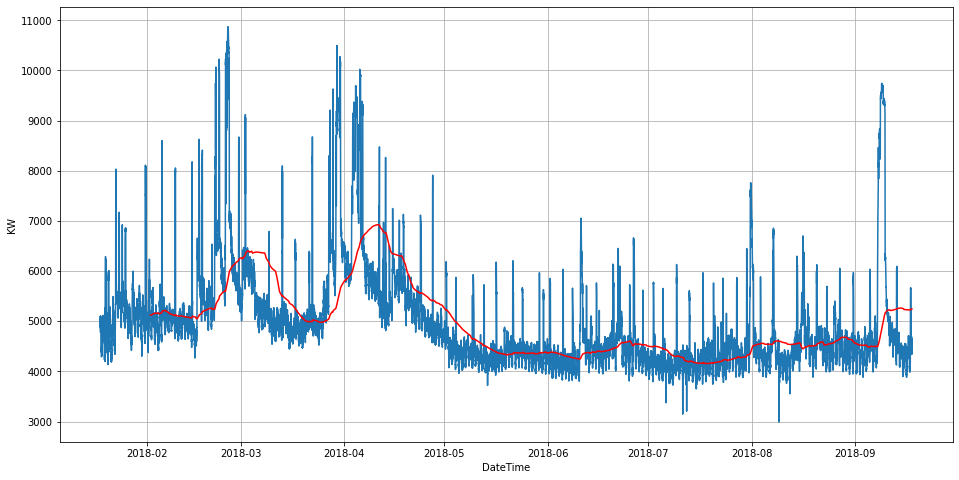

In [ ]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(x = data["DateTime"], y = data["KW"],ax = sub)
sns.lineplot(x = data["DateTime"], y = data["KW"].rolling(window=1440).mean(),ax = sub, color="red");
sub.grid()

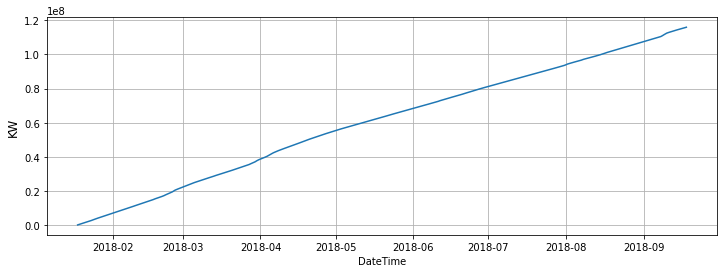

In [ ]:
cumSum_usage = data.set_index("DateTime")["KW"].cumsum()

fig,sub = plt.subplots(1,1,figsize=(12,4))
sns.lineplot(x=cumSum_usage.index,y=cumSum_usage.values,ax = sub)
sub.set_ylabel("KW", fontdict={"fontsize":12})
sub.grid()

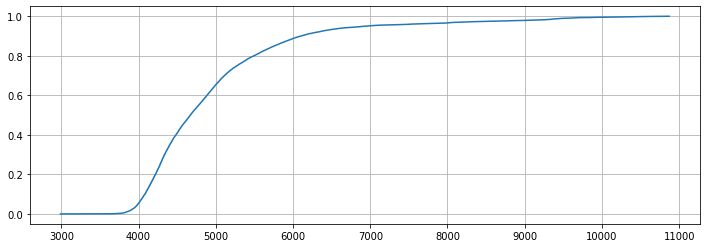

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

fig,sub=plt.subplots(1,1,figsize=(12,4))

ecdf = ECDF(data["KW"])
sns.lineplot(x=ecdf.x, y=ecdf.y,ax=sub)
sub.grid()

In [ ]:
data.groupby('Year')['KW'].mean()

Year
2018    4972.784294
Name: KW, dtype: float64

In [ ]:
data.groupby('Month')['KW'].mean()

Month
1    5128.475501
2    5697.204197
3    5540.714634
4    5798.738600
5    4388.706966
6    4452.592497
7    4296.857748
8    4556.047877
9    5135.160360
Name: KW, dtype: float64